In [1]:
import logging

# Disable RDKit logging
logger = logging.getLogger('rdkit')
logger.disabled = True
import rdkit
print(rdkit.__version__)
from rdkit import Chem
import numpy as np
import pandas as pd
from rdkit.Chem import AllChem, PandasTools

2021.03.2


In [2]:
'''
The activity data of compounds tested on CYP19A1 (homo sapiens) were downloaded from ChEMBL (CHEMBL1987). 
Only the compounds with IC50 tested and pChEMBL values calculated were selected for further processing and analysis. 
'''
dfic50 = pd.read_csv('./datasets/1_raw/Chembl_IC50.csv', delimiter=';')

In [3]:
len(dfic50)

2926

In [4]:
dfic50.dropna(subset = ['Smiles'],inplace=True)
len(dfic50)

2926

In [5]:
dfic50["Standard Units"].unique(), dfic50['Standard Relation'].unique()

(array(['nM', nan, 'ug.mL-1', 'mg kg-1'], dtype=object),
 array(["'='", "'>'", nan, "'>='"], dtype=object))

In [6]:
dfic50_1 = dfic50[dfic50['Standard Relation']=="'='"]
dfic50_2 = dfic50.loc[(dfic50['Standard Relation']=="'>'")|(dfic50['Standard Relation']=="'>='")]
dfic50_3 = dfic50[dfic50['Standard Relation'].isna()]
len(dfic50_1), len(dfic50_2), len(dfic50_3)


(2569, 281, 76)

In [7]:
dfic50_1.dropna(subset = ['pChEMBL Value'],inplace=True)
len(dfic50_1)

/tmp/ipykernel_594580/1455268226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfic50_1.dropna(subset = ['pChEMBL Value'],inplace=True)


2484

In [8]:
dfic50_1

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL174579,NaN,NaN,275.15,0.0,3.66,9b,Brc1ccc2c(c1)CC/C2=C/c1c[nH]cn1,IC50,'=',...,Cytochrome P450 19A1,Homo sapiens,SINGLE PROTEIN,CHEMBL1144350,1,Scientific Literature,J Med Chem,2005.0,NaN,NaN
1,CHEMBL1825024,NaN,NaN,235.29,0.0,2.92,28,c1ccc(C(c2ccccc2)n2cncn2)cc1,IC50,'=',...,Cytochrome P450 19A1,Homo sapiens,SINGLE PROTEIN,CHEMBL1821589,1,Scientific Literature,Eur J Med Chem,2011.0,NaN,NaN
2,CHEMBL28,APIGENIN,NaN,270.24,0.0,2.58,Apigenin,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,IC50,'=',...,Cytochrome P450 19A1,Homo sapiens,SINGLE PROTEIN,CHEMBL1157768,1,Scientific Literature,Bioorg Med Chem Lett,2010.0,NaN,NaN
3,CHEMBL196328,NaN,NaN,314.18,0.0,4.67,BDBM8911,COc1ccc2cc(-c3cccnc3)ccc2c1Br,IC50,'=',...,Cytochrome P450 19A1,Homo sapiens,SINGLE PROTEIN,CHEMBL3886626,37,BindingDB Database,NaN,2016.0,NaN,NaN
5,CHEMBL306022,NaN,NaN,302.50,1.0,5.34,15b,CC[C@@H]1CC2C(CCC3(C)C(O)CCC23)C2(C)CCCC=C12,IC50,'=',...,Cytochrome P450 19A1,Homo sapiens,SINGLE PROTEIN,CHEMBL1129695,1,Scientific Literature,J Med Chem,1996.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,CHEMBL206351,NaN,NaN,237.30,0.0,3.58,BDBM8891,COc1ccc2c(c1)CCC(c1cccnc1)=C2,IC50,'=',...,Cytochrome P450 19A1,Homo sapiens,SINGLE PROTEIN,CHEMBL3886626,37,BindingDB Database,NaN,2016.0,NaN,NaN
2922,CHEMBL4632445,NaN,NaN,358.40,0.0,3.98,3a,CCC#CCOc1ccc2c(=O)c3ccc(Cn4ccnc4)cc3oc2c1,IC50,'=',...,Cytochrome P450 19A1,Homo sapiens,SINGLE PROTEIN,CHEMBL4610109,1,Scientific Literature,ACS Med Chem Lett,2020.0,NaN,NaN
2923,CHEMBL4634777,NaN,NaN,358.40,0.0,3.98,1a,CCC#CCOc1cc(Cn2ccnc2)c2oc3ccccc3c(=O)c2c1,IC50,'=',...,Cytochrome P450 19A1,Homo sapiens,SINGLE PROTEIN,CHEMBL4610109,1,Scientific Literature,ACS Med Chem Lett,2020.0,NaN,NaN
2924,CHEMBL4755831,NaN,NaN,383.45,0.0,4.54,26,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,IC50,'=',...,Cytochrome P450 19A1,Homo sapiens,SINGLE PROTEIN,CHEMBL4715691,1,Scientific Literature,J Med Chem,2016.0,NaN,TIME = 0.5 hr


In [9]:
len(dfic50_1[dfic50_1['pChEMBL Value']>=6]),len(dfic50_1[dfic50_1['pChEMBL Value']<6])

(1361, 1123)

In [10]:
import sys
sys.path.append('/home/sliu/cyp_related_coding/CYP19_inhibitor_screening/')
'''
The following function used for molecule preprocessing is from 'RingSySTEMS' project: https://github.com/anya-chen/RingSystems/tree/master/Preprocessing/src
'''
from src import MoleculePreprocessor
from src.MoleculePreprocessor import MoleculePreprocessor
from src.MoleculePreprocessorExtended import MoleculePreprocessorExtended

In [11]:
moleculesProcessed = MoleculePreprocessorExtended.init_with_smiles(list(dfic50_1.Smiles))

In [12]:
from rdkit import RDLogger
moleculesProcessed.csp_wash()

In [13]:
preprocessedSmilesDict = moleculesProcessed.get_rawsmiles_smiles_dict()

In [14]:
preprocessedSmiles_df = pd.DataFrame(list(preprocessedSmilesDict.items()), columns=['rawSmiles','preprocessedSmiles'])

In [15]:
preprocessed_df = pd.merge(dfic50_1, preprocessedSmiles_df, 
                           left_on='Smiles', right_on='rawSmiles')

In [16]:
preprocessed_df.dropna(subset=['preprocessedSmiles'],inplace=True) 

In [17]:
preprocessed_df = preprocessed_df[preprocessed_df['preprocessedSmiles']!='']

In [18]:
len(preprocessed_df)

1997

In [19]:
# Use the loc method to set the values in the new column based on the values in the existing column
preprocessed_df.loc[preprocessed_df['pChEMBL Value']>=6, 'y_true_label'] = '1'
preprocessed_df.loc[preprocessed_df['pChEMBL Value']<6, 'y_true_label'] = '0'

In [20]:
def remove_stereochemistry(smiles):
    # Convert the SMILES string to an RDKit molecule object
    mol = Chem.MolFromSmiles(smiles)
    
    # Use the Chem.RemoveStereochemistry function to remove stereo informationz
    Chem.RemoveStereochemistry(mol)
    
    # Convert the molecule back to a SMILES string without stereochemistry
    return Chem.MolToSmiles(mol)

preprocessed_df['preprocessedSmiles'] = preprocessed_df['preprocessedSmiles'].apply(remove_stereochemistry)
preprocessed_df

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,rawSmiles,preprocessedSmiles,y_true_label
0,CHEMBL174579,NaN,NaN,275.15,0.0,3.66,9b,Brc1ccc2c(c1)CC/C2=C/c1c[nH]cn1,IC50,'=',...,CHEMBL1144350,1,Scientific Literature,J Med Chem,2005.0,NaN,NaN,Brc1ccc2c(c1)CC/C2=C/c1c[nH]cn1,Brc1ccc2c(c1)CCC2=Cc1c[nH]cn1,1
2,CHEMBL28,APIGENIN,NaN,270.24,0.0,2.58,Apigenin,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,IC50,'=',...,CHEMBL1157768,1,Scientific Literature,Bioorg Med Chem Lett,2010.0,NaN,NaN,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,1
3,CHEMBL28,APIGENIN,NaN,270.24,0.0,2.58,35,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,IC50,'=',...,CHEMBL1156709,1,Scientific Literature,Eur J Med Chem,2008.0,NaN,NaN,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,0
4,CHEMBL28,APIGENIN,NaN,270.24,0.0,2.58,12,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,IC50,'=',...,CHEMBL3621095,1,Scientific Literature,Eur J Med Chem,2015.0,NaN,NaN,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,0
5,CHEMBL28,APIGENIN,NaN,270.24,0.0,2.58,Apigenin,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,IC50,'=',...,CHEMBL1144205,1,Scientific Literature,Bioorg Med Chem,2008.0,NaN,NaN,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,CHEMBL224462,NaN,NaN,313.36,0.0,3.22,T46,CCC(c1ccc(C#N)cc1)(c1ccc(C#N)cc1)n1cncn1,IC50,'=',...,CHEMBL1139479,1,Scientific Literature,J Med Chem,2005.0,NaN,NaN,CCC(c1ccc(C#N)cc1)(c1ccc(C#N)cc1)n1cncn1,CCC(c1ccc(C#N)cc1)(c1ccc(C#N)cc1)n1cncn1,1
2480,CHEMBL4632445,NaN,NaN,358.40,0.0,3.98,3a,CCC#CCOc1ccc2c(=O)c3ccc(Cn4ccnc4)cc3oc2c1,IC50,'=',...,CHEMBL4610109,1,Scientific Literature,ACS Med Chem Lett,2020.0,NaN,NaN,CCC#CCOc1ccc2c(=O)c3ccc(Cn4ccnc4)cc3oc2c1,CCC#CCOc1ccc2c(=O)c3ccc(Cn4ccnc4)cc3oc2c1,1
2481,CHEMBL4634777,NaN,NaN,358.40,0.0,3.98,1a,CCC#CCOc1cc(Cn2ccnc2)c2oc3ccccc3c(=O)c2c1,IC50,'=',...,CHEMBL4610109,1,Scientific Literature,ACS Med Chem Lett,2020.0,NaN,NaN,CCC#CCOc1cc(Cn2ccnc2)c2oc3ccccc3c(=O)c2c1,CCC#CCOc1cc(Cn2ccnc2)c2oc3ccccc3c(=O)c2c1,0
2482,CHEMBL4755831,NaN,NaN,383.45,0.0,4.54,26,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,IC50,'=',...,CHEMBL4715691,1,Scientific Literature,J Med Chem,2016.0,NaN,TIME = 0.5 hr,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,Nc1ccc(C(=Cn2ccnc2)C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,1


In [21]:
duplicates = preprocessed_df.duplicated('preprocessedSmiles', keep=False)

# Filter DataFrame to list duplicates with their information
duplicates_df = preprocessed_df[duplicates]
duplicates_df

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,rawSmiles,preprocessedSmiles,y_true_label
0,CHEMBL174579,NaN,NaN,275.15,0.0,3.66,9b,Brc1ccc2c(c1)CC/C2=C/c1c[nH]cn1,IC50,'=',...,CHEMBL1144350,1,Scientific Literature,J Med Chem,2005.0,NaN,NaN,Brc1ccc2c(c1)CC/C2=C/c1c[nH]cn1,Brc1ccc2c(c1)CCC2=Cc1c[nH]cn1,1
2,CHEMBL28,APIGENIN,NaN,270.24,0.0,2.58,Apigenin,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,IC50,'=',...,CHEMBL1157768,1,Scientific Literature,Bioorg Med Chem Lett,2010.0,NaN,NaN,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,1
3,CHEMBL28,APIGENIN,NaN,270.24,0.0,2.58,35,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,IC50,'=',...,CHEMBL1156709,1,Scientific Literature,Eur J Med Chem,2008.0,NaN,NaN,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,0
4,CHEMBL28,APIGENIN,NaN,270.24,0.0,2.58,12,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,IC50,'=',...,CHEMBL3621095,1,Scientific Literature,Eur J Med Chem,2015.0,NaN,NaN,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,0
5,CHEMBL28,APIGENIN,NaN,270.24,0.0,2.58,Apigenin,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,IC50,'=',...,CHEMBL1144205,1,Scientific Literature,Bioorg Med Chem,2008.0,NaN,NaN,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421,CHEMBL314351,NaN,NaN,260.34,0.0,2.29,Page 2677,CCCN1C(=O)CC[C@](CC)(c2ccncc2)C1=O,IC50,'=',...,CHEMBL1125058,1,Scientific Literature,J Med Chem,1990.0,NaN,NaN,CCCN1C(=O)CC[C@](CC)(c2ccncc2)C1=O,CCCN1C(=O)CCC(CC)(c2ccncc2)C1=O,0
2428,CHEMBL92488,NaN,NaN,251.29,0.0,3.00,5,O=C1/C(=C/c2ccncc2)CCc2c(O)cccc21,IC50,'=',...,CHEMBL1125863,1,Scientific Literature,J Med Chem,1991.0,NaN,NaN,O=C1/C(=C/c2ccncc2)CCc2c(O)cccc21,O=C1C(=Cc2ccncc2)CCc2c(O)cccc21,1
2429,CHEMBL92488,NaN,NaN,251.29,0.0,3.00,T55,O=C1/C(=C/c2ccncc2)CCc2c(O)cccc21,IC50,'=',...,CHEMBL1139479,1,Scientific Literature,J Med Chem,2005.0,NaN,NaN,O=C1/C(=C/c2ccncc2)CCc2c(O)cccc21,O=C1C(=Cc2ccncc2)CCc2c(O)cccc21,1
2460,CHEMBL132072,NaN,NaN,273.38,0.0,3.24,1,C[C@@H]1C(OC(=O)Cc2ccncc2)CC2CC1C2(C)C,IC50,'=',...,CHEMBL1128320,1,Scientific Literature,J Med Chem,1995.0,NaN,NaN,C[C@@H]1C(OC(=O)Cc2ccncc2)CC2CC1C2(C)C,CC1C(OC(=O)Cc2ccncc2)CC2CC1C2(C)C,1


In [22]:
groups = duplicates_df.groupby('preprocessedSmiles')
id_toremove = []
for name, group in groups:
    # Check if all values in 'y_true_label' are the same within the group
    if not group['y_true_label'].nunique() == 1:
        # Print out 'Molecule ChEMBL ID' for all entries in the group
        print(f"Different activity classifications found for {name}:")
        for chembl_id in group['Molecule ChEMBL ID']:
            print(chembl_id)
            id_toremove.append(chembl_id)

Different activity classifications found for C=C1CC2C3CCC(=O)C3(C)CCC2C2(C)C1=CC(=O)C1OC12:
CHEMBL3407537
CHEMBL3407537
Different activity classifications found for CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)cc4Cl)O3)cc2)CC1:
CHEMBL157101
CHEMBL157101
CHEMBL157101
CHEMBL157101
CHEMBL157101
CHEMBL157101
CHEMBL157101
CHEMBL157101
CHEMBL157101
CHEMBL157101
CHEMBL157101
CHEMBL328863
CHEMBL75
CHEMBL75
CHEMBL75
CHEMBL75
CHEMBL319160
Different activity classifications found for CC(C)=CCc1cc(C2CC(=O)c3ccc(O)cc3O2)ccc1O:
CHEMBL558103
CHEMBL389924
CHEMBL389924
CHEMBL389924
Different activity classifications found for CC12CCC3C(CC(Cc4ccccc4)=C4CC(=O)CCC43C)C1CCC2=O:
CHEMBL24897
CHEMBL25523
Different activity classifications found for CC12CCC3C(CC(O)C4=CCCCC43CO)C1CCC2=O:
CHEMBL1630266
CHEMBL1630266
CHEMBL1630267
CHEMBL1630267
Different activity classifications found for CC12CCC3C(CC=C4C(O)CCCC43CO)C1CCC2=O:
CHEMBL1630273
CHEMBL1630273
CHEMBL1630274
CHEMBL1630274
Different activity classificatio

In [23]:
print(len(id_toremove))

170


In [24]:
print(len(set(id_toremove)))

49


In [25]:
# Drop the rows involved in the printed chembl_ids
for i in set(id_toremove):
    preprocessed_df = preprocessed_df[preprocessed_df['Molecule ChEMBL ID'] != i]

In [26]:
preprocessed_df

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,rawSmiles,preprocessedSmiles,y_true_label
0,CHEMBL174579,NaN,NaN,275.15,0.0,3.66,9b,Brc1ccc2c(c1)CC/C2=C/c1c[nH]cn1,IC50,'=',...,CHEMBL1144350,1,Scientific Literature,J Med Chem,2005.0,NaN,NaN,Brc1ccc2c(c1)CC/C2=C/c1c[nH]cn1,Brc1ccc2c(c1)CCC2=Cc1c[nH]cn1,1
6,CHEMBL196328,NaN,NaN,314.18,0.0,4.67,BDBM8911,COc1ccc2cc(-c3cccnc3)ccc2c1Br,IC50,'=',...,CHEMBL3886626,37,BindingDB Database,NaN,2016.0,NaN,NaN,COc1ccc2cc(-c3cccnc3)ccc2c1Br,COc1ccc2cc(-c3cccnc3)ccc2c1Br,0
7,CHEMBL196328,NaN,NaN,314.18,0.0,4.67,10,COc1ccc2cc(-c3cccnc3)ccc2c1Br,IC50,'=',...,CHEMBL1141125,1,Scientific Literature,J Med Chem,2005.0,NaN,NaN,COc1ccc2cc(-c3cccnc3)ccc2c1Br,COc1ccc2cc(-c3cccnc3)ccc2c1Br,0
8,CHEMBL306022,NaN,NaN,302.50,1.0,5.34,15b,CC[C@@H]1CC2C(CCC3(C)C(O)CCC23)C2(C)CCCC=C12,IC50,'=',...,CHEMBL1129695,1,Scientific Literature,J Med Chem,1996.0,NaN,NaN,CC[C@@H]1CC2C(CCC3(C)C(O)CCC23)C2(C)CCCC=C12,CCC1CC2C(CCC3(C)C(O)CCC23)C2(C)CCCC=C12,1
9,CHEMBL495567,NaN,NaN,335.79,1.0,5.19,"9, NSC-12999",COc1ccc2nc3cc(Cl)ccc3c(Nc3cccnc3)c2c1,IC50,'=',...,CHEMBL1139349,1,Scientific Literature,J Med Chem,2009.0,NaN,NaN,COc1ccc2nc3cc(Cl)ccc3c(Nc3cccnc3)c2c1,COc1ccc2nc3cc(Cl)ccc3c(Nc3cccnc3)c2c1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,CHEMBL224462,NaN,NaN,313.36,0.0,3.22,T46,CCC(c1ccc(C#N)cc1)(c1ccc(C#N)cc1)n1cncn1,IC50,'=',...,CHEMBL1139479,1,Scientific Literature,J Med Chem,2005.0,NaN,NaN,CCC(c1ccc(C#N)cc1)(c1ccc(C#N)cc1)n1cncn1,CCC(c1ccc(C#N)cc1)(c1ccc(C#N)cc1)n1cncn1,1
2480,CHEMBL4632445,NaN,NaN,358.40,0.0,3.98,3a,CCC#CCOc1ccc2c(=O)c3ccc(Cn4ccnc4)cc3oc2c1,IC50,'=',...,CHEMBL4610109,1,Scientific Literature,ACS Med Chem Lett,2020.0,NaN,NaN,CCC#CCOc1ccc2c(=O)c3ccc(Cn4ccnc4)cc3oc2c1,CCC#CCOc1ccc2c(=O)c3ccc(Cn4ccnc4)cc3oc2c1,1
2481,CHEMBL4634777,NaN,NaN,358.40,0.0,3.98,1a,CCC#CCOc1cc(Cn2ccnc2)c2oc3ccccc3c(=O)c2c1,IC50,'=',...,CHEMBL4610109,1,Scientific Literature,ACS Med Chem Lett,2020.0,NaN,NaN,CCC#CCOc1cc(Cn2ccnc2)c2oc3ccccc3c(=O)c2c1,CCC#CCOc1cc(Cn2ccnc2)c2oc3ccccc3c(=O)c2c1,0
2482,CHEMBL4755831,NaN,NaN,383.45,0.0,4.54,26,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,IC50,'=',...,CHEMBL4715691,1,Scientific Literature,J Med Chem,2016.0,NaN,TIME = 0.5 hr,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,Nc1ccc(C(=Cn2ccnc2)C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,1


In [27]:
preprocessed_df.drop_duplicates('preprocessedSmiles',inplace=True)
preprocessed_df

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,rawSmiles,preprocessedSmiles,y_true_label
0,CHEMBL174579,NaN,NaN,275.15,0.0,3.66,9b,Brc1ccc2c(c1)CC/C2=C/c1c[nH]cn1,IC50,'=',...,CHEMBL1144350,1,Scientific Literature,J Med Chem,2005.0,NaN,NaN,Brc1ccc2c(c1)CC/C2=C/c1c[nH]cn1,Brc1ccc2c(c1)CCC2=Cc1c[nH]cn1,1
6,CHEMBL196328,NaN,NaN,314.18,0.0,4.67,BDBM8911,COc1ccc2cc(-c3cccnc3)ccc2c1Br,IC50,'=',...,CHEMBL3886626,37,BindingDB Database,NaN,2016.0,NaN,NaN,COc1ccc2cc(-c3cccnc3)ccc2c1Br,COc1ccc2cc(-c3cccnc3)ccc2c1Br,0
8,CHEMBL306022,NaN,NaN,302.50,1.0,5.34,15b,CC[C@@H]1CC2C(CCC3(C)C(O)CCC23)C2(C)CCCC=C12,IC50,'=',...,CHEMBL1129695,1,Scientific Literature,J Med Chem,1996.0,NaN,NaN,CC[C@@H]1CC2C(CCC3(C)C(O)CCC23)C2(C)CCCC=C12,CCC1CC2C(CCC3(C)C(O)CCC23)C2(C)CCCC=C12,1
9,CHEMBL495567,NaN,NaN,335.79,1.0,5.19,"9, NSC-12999",COc1ccc2nc3cc(Cl)ccc3c(Nc3cccnc3)c2c1,IC50,'=',...,CHEMBL1139349,1,Scientific Literature,J Med Chem,2009.0,NaN,NaN,COc1ccc2nc3cc(Cl)ccc3c(Nc3cccnc3)c2c1,COc1ccc2nc3cc(Cl)ccc3c(Nc3cccnc3)c2c1,1
10,CHEMBL495777,NaN,NaN,310.31,0.0,3.45,"11, NSC-131736",COc1ccc2c(Cc3cccc([N+](=O)[O-])c3)cncc2c1O,IC50,'=',...,CHEMBL1139349,1,Scientific Literature,J Med Chem,2009.0,NaN,NaN,COc1ccc2c(Cc3cccc([N+](=O)[O-])c3)cncc2c1O,COc1ccc2c(Cc3cccc([N+](=O)[O-])c3)cncc2c1O,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,CHEMBL224462,NaN,NaN,313.36,0.0,3.22,T46,CCC(c1ccc(C#N)cc1)(c1ccc(C#N)cc1)n1cncn1,IC50,'=',...,CHEMBL1139479,1,Scientific Literature,J Med Chem,2005.0,NaN,NaN,CCC(c1ccc(C#N)cc1)(c1ccc(C#N)cc1)n1cncn1,CCC(c1ccc(C#N)cc1)(c1ccc(C#N)cc1)n1cncn1,1
2480,CHEMBL4632445,NaN,NaN,358.40,0.0,3.98,3a,CCC#CCOc1ccc2c(=O)c3ccc(Cn4ccnc4)cc3oc2c1,IC50,'=',...,CHEMBL4610109,1,Scientific Literature,ACS Med Chem Lett,2020.0,NaN,NaN,CCC#CCOc1ccc2c(=O)c3ccc(Cn4ccnc4)cc3oc2c1,CCC#CCOc1ccc2c(=O)c3ccc(Cn4ccnc4)cc3oc2c1,1
2481,CHEMBL4634777,NaN,NaN,358.40,0.0,3.98,1a,CCC#CCOc1cc(Cn2ccnc2)c2oc3ccccc3c(=O)c2c1,IC50,'=',...,CHEMBL4610109,1,Scientific Literature,ACS Med Chem Lett,2020.0,NaN,NaN,CCC#CCOc1cc(Cn2ccnc2)c2oc3ccccc3c(=O)c2c1,CCC#CCOc1cc(Cn2ccnc2)c2oc3ccccc3c(=O)c2c1,0
2482,CHEMBL4755831,NaN,NaN,383.45,0.0,4.54,26,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,IC50,'=',...,CHEMBL4715691,1,Scientific Literature,J Med Chem,2016.0,NaN,TIME = 0.5 hr,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,Nc1ccc(C(=Cn2ccnc2)C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,1


In [28]:
# Check for duplicates in 'preprocessedSmiles'
duplicates = preprocessed_df.duplicated(subset='preprocessedSmiles', keep=False)

# Show rows where 'preprocessedSmiles' is duplicated
duplicate_rows = preprocessed_df[duplicates]
duplicate_rows

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,rawSmiles,preprocessedSmiles,y_true_label


In [29]:
len(preprocessed_df[preprocessed_df['pChEMBL Value']>=6]),len(preprocessed_df[preprocessed_df['pChEMBL Value']<6])

(759, 626)

In [30]:
preprocessed_df_useful = preprocessed_df[['preprocessedSmiles','Molecule ChEMBL ID', 'y_true_label']]
preprocessed_df_useful

,preprocessedSmiles,Molecule ChEMBL ID,y_true_label
0,Brc1ccc2c(c1)CCC2=Cc1c[nH]cn1,CHEMBL174579,1
6,COc1ccc2cc(-c3cccnc3)ccc2c1Br,CHEMBL196328,0
8,CCC1CC2C(CCC3(C)C(O)CCC23)C2(C)CCCC=C12,CHEMBL306022,1
9,COc1ccc2nc3cc(Cl)ccc3c(Nc3cccnc3)c2c1,CHEMBL495567,1
10,COc1ccc2c(Cc3cccc([N+](=O)[O-])c3)cncc2c1O,CHEMBL495777,0
...,...,...,...
2479,CCC(c1ccc(C#N)cc1)(c1ccc(C#N)cc1)n1cncn1,CHEMBL224462,1
2480,CCC#CCOc1ccc2c(=O)c3ccc(Cn4ccnc4)cc3oc2c1,CHEMBL4632445,1
2481,CCC#CCOc1cc(Cn2ccnc2)c2oc3ccccc3c(=O)c2c1,CHEMBL4634777,0
2482,Nc1ccc(C(=Cn2ccnc2)C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,CHEMBL4755831,1


In [31]:
# add rdKit mol object to the dataframe
PandasTools.AddMoleculeColumnToFrame(preprocessed_df_useful,'preprocessedSmiles','Molecule')

/home/sliu/miniconda3/envs/cypscreen/lib/python3.8/site-packages/rdkit/Chem/PandasTools.py:425: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,preprocessedSmiles,Molecule ChEMBL ID,y_true_label,Molecule
0,Brc1ccc2c(c1)CCC2=Cc1c[nH]cn1,CHEMBL174579,1,
6,COc1ccc2cc(-c3cccnc3)ccc2c1Br,CHEMBL196328,0,
8,CCC1CC2C(CCC3(C)C(O)CCC23)C2(C)CCCC=C12,CHEMBL306022,1,
9,COc1ccc2nc3cc(Cl)ccc3c(Nc3cccnc3)c2c1,CHEMBL495567,1,
10,COc1ccc2c(Cc3cccc([N+](=O)[O-])c3)cncc2c1O,CHEMBL495777,0,
...,...,...,...,...
2479,CCC(c1ccc(C#N)cc1)(c1ccc(C#N)cc1)n1cncn1,CHEMBL224462,1,
2480,CCC#CCOc1ccc2c(=O)c3ccc(Cn4ccnc4)cc3oc2c1,CHEMBL4632445,1,
2481,CCC#CCOc1cc(Cn2ccnc2)c2oc3ccccc3c(=O)c2c1,CHEMBL4634777,0,
2482,Nc1ccc(C(=Cn2ccnc2)C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,CHEMBL4755831,1,

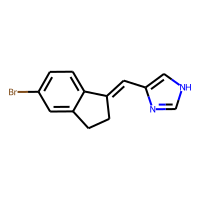
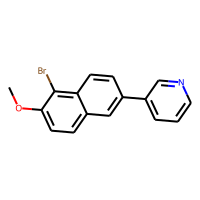
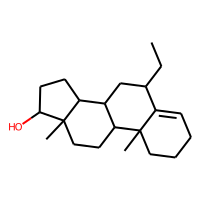
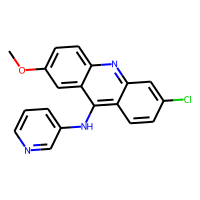
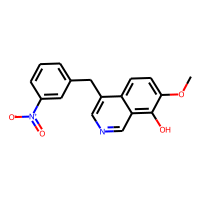
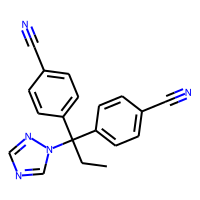
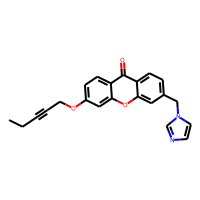
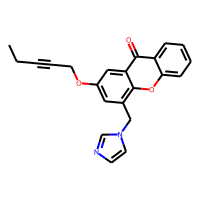
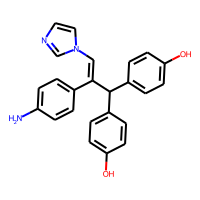
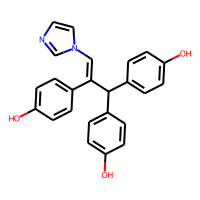

In [32]:
preprocessed_df_useful

In [33]:
#Morgan2 FP
def get_morgan2(mol):
    return list(AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=2048))

In [34]:
import warnings

# Suppress specific performance warnings
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)


In [35]:
preprocessed_df_useful['fp'] = preprocessed_df_useful['Molecule'].apply(get_morgan2) #doesn't work if save the fp in one column, but check duplicates first

,preprocessedSmiles,Molecule ChEMBL ID,y_true_label,Molecule,fp
0,Brc1ccc2c(c1)CCC2=Cc1c[nH]cn1,CHEMBL174579,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,COc1ccc2cc(-c3cccnc3)ccc2c1Br,CHEMBL196328,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,CCC1CC2C(CCC3(C)C(O)CCC23)C2(C)CCCC=C12,CHEMBL306022,1,,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
9,COc1ccc2nc3cc(Cl)ccc3c(Nc3cccnc3)c2c1,CHEMBL495567,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
10,COc1ccc2c(Cc3cccc([N+](=O)[O-])c3)cncc2c1O,CHEMBL495777,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
2479,CCC(c1ccc(C#N)cc1)(c1ccc(C#N)cc1)n1cncn1,CHEMBL224462,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2480,CCC#CCOc1ccc2c(=O)c3ccc(Cn4ccnc4)cc3oc2c1,CHEMBL4632445,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2481,CCC#CCOc1cc(Cn2ccnc2)c2oc3ccccc3c(=O)c2c1,CHEMBL4634777,0,,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2482,Nc1ccc(C(=Cn2ccnc2)C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,CHEMBL4755831,1,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

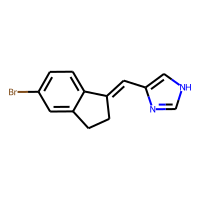
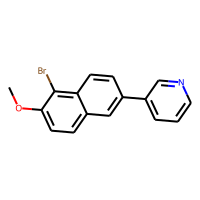
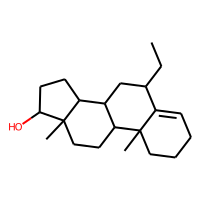
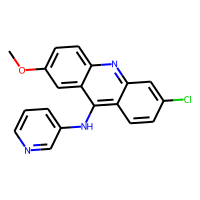
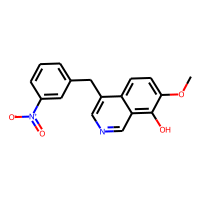
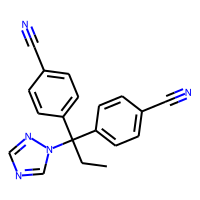
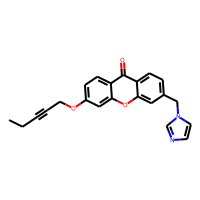
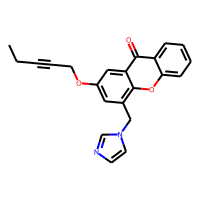
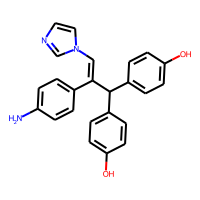
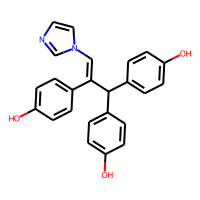

In [36]:
preprocessed_df_useful

In [37]:
def find_duplicates_with_labels(dataframe, fingerprint_col, label_col):
    # Initialize dictionary to hold fingerprints and their respective indices and labels
    fingerprint_dict = {}

    # Iterate through DataFrame rows
    for index, row in dataframe.iterrows():
        fp_tuple = tuple(row[fingerprint_col])
        label = row[label_col]

        # Update dictionary with index and label for each fingerprint
        if fp_tuple not in fingerprint_dict:
            fingerprint_dict[fp_tuple] = {'indices': [index], 'labels': [label]}
        else:
            fingerprint_dict[fp_tuple]['indices'].append(index)
            fingerprint_dict[fp_tuple]['labels'].append(label)

    # Identify duplicates: those with more than one index and check labels
    duplicates = {}
    for fp, details in fingerprint_dict.items():
        if len(details['indices']) > 1:
            # Check if all labels for these indices are the same
            if len(set(details['labels'])) == 1:
                duplicates[fp] = {'indices': details['indices'], 'labels': details['labels'][0], 'identical_labels': True}
            else:
                duplicates[fp] = {'indices': details['indices'], 'labels': set(details['labels']), 'identical_labels': False}

    return duplicates


In [38]:
import pandas as pd

def classify_duplicates(dataframe, fingerprint_col, label_col):
    fingerprint_dict = {}
    for index, row in dataframe.iterrows():
        fp_tuple = tuple(row[fingerprint_col])
        label = row[label_col]
        if fp_tuple not in fingerprint_dict:
            fingerprint_dict[fp_tuple] = {'indices': [index], 'labels': [label]}
        else:
            fingerprint_dict[fp_tuple]['indices'].append(index)
            fingerprint_dict[fp_tuple]['labels'].append(label)

    identical = []
    non_identical = []

    for fp, details in fingerprint_dict.items():
        if len(details['indices']) > 1:
            if len(set(details['labels'])) == 1:
                identical.extend(details['indices'][1:])
            else:
                non_identical.extend(details['indices'])

    return identical, non_identical


In [39]:
# Usage of the function
duplicates = find_duplicates_with_labels(preprocessed_df_useful, 'fp', 'y_true_label')

# Output results
if duplicates:
    print("Duplicates found:")
    for fp, info in duplicates.items():
        print(f"Fingerprint {fp} appears at rows {info['indices']} with labels {info['labels']} - Identical Labels: {info['identical_labels']}")
else:
    print("No duplicates found.")


Duplicates found:
Fingerprint (0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

,preprocessedSmiles,Molecule ChEMBL ID,y_true_label,Molecule,fp
0,Brc1ccc2c(c1)CCC2=Cc1c[nH]cn1,CHEMBL174579,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,COc1ccc2cc(-c3cccnc3)ccc2c1Br,CHEMBL196328,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,CCC1CC2C(CCC3(C)C(O)CCC23)C2(C)CCCC=C12,CHEMBL306022,1,,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
9,COc1ccc2nc3cc(Cl)ccc3c(Nc3cccnc3)c2c1,CHEMBL495567,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
10,COc1ccc2c(Cc3cccc([N+](=O)[O-])c3)cncc2c1O,CHEMBL495777,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
2479,CCC(c1ccc(C#N)cc1)(c1ccc(C#N)cc1)n1cncn1,CHEMBL224462,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2480,CCC#CCOc1ccc2c(=O)c3ccc(Cn4ccnc4)cc3oc2c1,CHEMBL4632445,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2481,CCC#CCOc1cc(Cn2ccnc2)c2oc3ccccc3c(=O)c2c1,CHEMBL4634777,0,,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2482,Nc1ccc(C(=Cn2ccnc2)C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,CHEMBL4755831,1,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

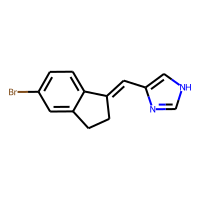
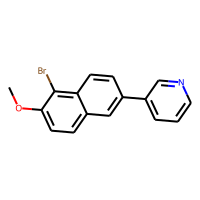
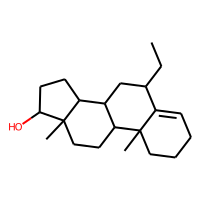
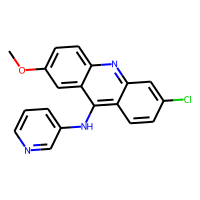
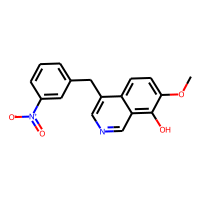
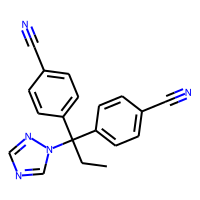
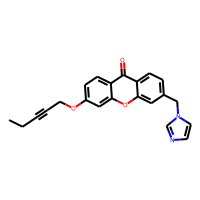
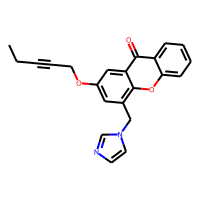
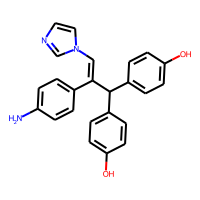
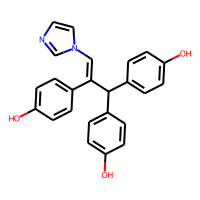

In [40]:
# Classify duplicates
identical_indices, non_identical_indices = classify_duplicates(preprocessed_df_useful, 'fp', 'y_true_label')

# Drop non-identical labels completely and identical label duplicates keeping the first occurrence
df_cleaned = preprocessed_df_useful.drop(index=non_identical_indices + identical_indices)
df_cleaned

In [41]:
morgan2_cols = ['morgan2_b'+str(i) for i in list(range(2048))]
df_cleaned[morgan2_cols] = df_cleaned.fp.to_list()

,preprocessedSmiles,Molecule ChEMBL ID,y_true_label,Molecule,fp,morgan2_b0,morgan2_b1,morgan2_b2,morgan2_b3,morgan2_b4,...,morgan2_b2038,morgan2_b2039,morgan2_b2040,morgan2_b2041,morgan2_b2042,morgan2_b2043,morgan2_b2044,morgan2_b2045,morgan2_b2046,morgan2_b2047
0,Brc1ccc2c(c1)CCC2=Cc1c[nH]cn1,CHEMBL174579,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,COc1ccc2cc(-c3cccnc3)ccc2c1Br,CHEMBL196328,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,CCC1CC2C(CCC3(C)C(O)CCC23)C2(C)CCCC=C12,CHEMBL306022,1,,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,COc1ccc2nc3cc(Cl)ccc3c(Nc3cccnc3)c2c1,CHEMBL495567,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,COc1ccc2c(Cc3cccc([N+](=O)[O-])c3)cncc2c1O,CHEMBL495777,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,CCC(c1ccc(C#N)cc1)(c1ccc(C#N)cc1)n1cncn1,CHEMBL224462,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2480,CCC#CCOc1ccc2c(=O)c3ccc(Cn4ccnc4)cc3oc2c1,CHEMBL4632445,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2481,CCC#CCOc1cc(Cn2ccnc2)c2oc3ccccc3c(=O)c2c1,CHEMBL4634777,0,,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2482,Nc1ccc(C(=Cn2ccnc2)C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,CHEMBL4755831,1,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0

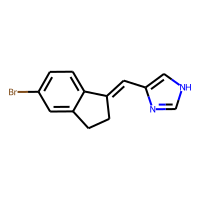
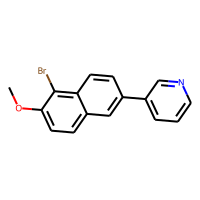
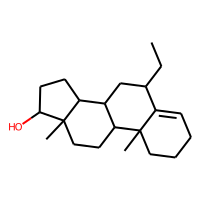
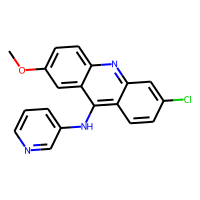
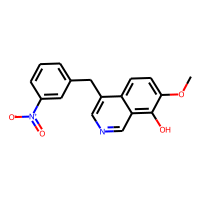
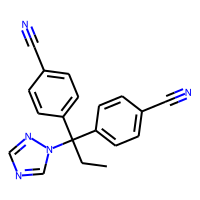
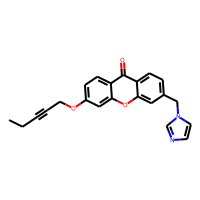
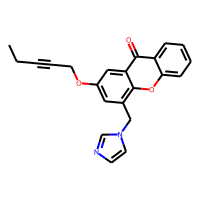
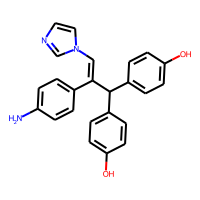
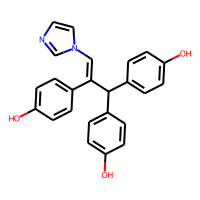

In [42]:
df_cleaned

## generate RDKit 2D descriptors

In [43]:
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

PandasTools.AddMoleculeColumnToFrame(df_cleaned,'preprocessedSmiles','Molecule')
descriptors_list = [x[0] for x in Descriptors._descList]
print(descriptors_list)
print(len(descriptors_list))

['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'Slo

In [44]:
def compute_2Drdkit(mol):
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    ds = calc.CalcDescriptors(mol)
    return list(ds)


In [45]:
df_cleaned['descriptor'] = df_cleaned.Molecule.apply(compute_2Drdkit)
#one descriptor per column
calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
desc_cols = list(calc.GetDescriptorNames())
df_cleaned[desc_cols] = df_cleaned.descriptor.to_list()

In [46]:
df_cleaned[desc_cols]

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,4.228995,1.005341,4.228995,1.005341,0.844932,275.149,264.061,274.010560,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.311073,0.848729,5.311073,0.848729,0.685407,314.182,302.086,313.010226,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,10.582239,-0.032752,10.582239,0.032752,0.648494,302.502,268.230,302.260966,124.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.139654,0.662212,6.139654,0.662212,0.523359,335.794,321.682,335.082540,118.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,10.879415,-0.415136,10.879415,0.040178,0.588994,310.309,296.197,310.095357,116.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,9.038998,-0.543183,9.038998,0.543183,0.740537,313.364,298.244,313.132745,116.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2480,12.788407,-0.043745,12.788407,0.043745,0.408911,358.397,340.253,358.131742,134.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2481,13.008467,-0.065904,13.008467,0.065904,0.408911,358.397,340.253,358.131742,134.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2482,9.765064,-0.136829,9.765064,0.136829,0.435979,383.451,362.283,383.163377,144.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df_cleaned[desc_cols].describe()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.0,...,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.0,1365.000000,1365.000000,1365.000000
mean,11.080630,-0.907200,11.080630,0.185241,0.592124,356.314084,336.423623,355.918108,131.065201,0.0,...,0.035165,0.178022,0.002930,0.005128,0.003663,0.027106,0.0,0.009524,0.088645,0.000733
std,2.634248,1.611815,2.634248,0.217643,0.177085,99.306028,96.216235,99.129314,34.230622,0.0,...,0.192056,0.467210,0.054074,0.071454,0.060434,0.166904,0.0,0.097160,0.552437,0.027067
min,2.402778,-5.325792,2.402778,0.000110,0.048436,250.301000,228.162000,250.110613,78.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,9.777155,-0.800948,9.777155,0.043286,0.489938,298.382000,276.210000,298.156895,112.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,12.218830,-0.238735,12.218830,0.100443,0.614555,333.391000,314.239000,333.147727,124.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,12.787358,0.028280,12.787358,0.240167,0.724788,379.312000,361.214000,378.219495,140.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,16.050416,1.181950,16.050416,1.181950,0.933823,892.866000,859.602000,892.179952,320.000000,0.0,...,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.0,1.000000,10.000000,1.000000


In [48]:
df_cleaned[desc_cols].dropna(inplace=True)

In [49]:
df_cleaned[desc_cols].isnull().values.any()

False

In [50]:
df_cleaned.reset_index(inplace=True)

In [51]:
actives = df_cleaned[df_cleaned['y_true_label']=='1']
inactives = df_cleaned[df_cleaned['y_true_label']=='0']

In [52]:
len(actives), len(inactives)

(756, 609)

In [117]:
#save the preprocessed dataframe active and inactives
actives.to_csv('./datasets/2_preprocessed/chembl_preprocessed_active.csv', index=False)
inactives.to_csv('./datasets/2_preprocessed/chembl_preprocessed_inactive.csv', index=False)
df_cleaned.to_csv('./datasets/2_preprocessed/chembl_preprocessed.csv', index=False)

In [53]:
#shuffel the data when train and test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_cleaned, test_size= 0.2, random_state=42)
print(len(train), len(test))

1092 273


In [54]:
# get number of actives and inactives for both splits
train_actives = train[train['y_true_label']=='1']
train_inactives = train[train['y_true_label']=='0']
test_actives = test[test['y_true_label']=='1']
test_inactives = test[test['y_true_label']=='0']
len(train_actives), len(train_inactives), len(test_actives), len(test_inactives)

(610, 482, 146, 127)

In [120]:
train.to_csv('./datasets/3_train_test_split/chembl_train_ECFP4_rdkit2d.csv', index=False)
test.to_csv('./datasets/3_train_test_split/chembl_test_ECFP4_rdkit2d.csv', index=False)